<center>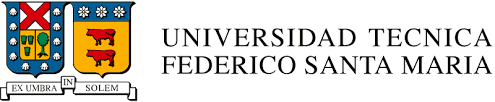</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,AdaBoostClassifier
from keras import Input,Model
from keras.layers import Dense
from keras.activations import relu, softmax

# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Aplique lo aprendido en la tarea 1 y obtenga los datos de la forma que le sea más conveniente siempre y cuando estos sean los del link de la descripción.

In [31]:
#from google.colab import files
#files.upload()

In [32]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [33]:
#!kaggle datasets download -d rajyellow46/wine-quality

In [34]:
#!unzip /content/wine-quality.zip

In [35]:
df = pd.read_csv('winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.1.1 Exploración del conjunto de datos

Explore el conjunto de datos y responda brevemente las siguientes preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

- Numéricos: fixed acidity, volatile acidity, citric acid, citric acid, citric acid, total sulfur dioxide, density, pH, sulphates, acohol, quality.

- Categóricos: Type


In [36]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,6497,2,0,0.000000
fixed acidity,float64,6487,106,10,0.153917
volatile acidity,float64,6489,187,8,0.123134
citric acid,float64,6494,89,3,0.046175
residual sugar,float64,6495,316,2,0.030783
chlorides,float64,6495,214,2,0.030783
free sulfur dioxide,float64,6497,135,0,0.000000
total sulfur dioxide,float64,6497,276,0,0.000000
density,float64,6497,998,0,0.000000
pH,float64,6488,108,9,0.138525


> b) ¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?

Existen datos faltantes en:
- fixed acidity (10)
- volatile acidity (8)
- citric acid (3)
- residual sugar (2)
- chlorides	 (2)
- ph (9)
- sulphates (4)

> c) ¿Qué técnicas conoce para rellenar los datos faltantes de los atributos del dataset? (si no conoce ninguna investigue al menos 2)

* Imputación Simple: se hace una sola estimación y esta es utilizada para reemplazar el valor faltante.
    - Imputación por la media o la mediana: se calcula la media o mediana de la variable que le faltan valores y se reemplaza por alguna de estas métricas. 
    - Imputación por regresión: Se reemplaza cada dato faltante por un valor predecido por algún modelo de regresión.
    - Imputación hot-deck: El valor faltante es reemplazado por valores de datos vecinos (usualmente se utiliza el k-Nearest Neighbors, busca los k valores más cercanos y reemplaza por el promedio de estos vecinos).
    
    
    
* Imputación múltiple: se realizan multiples estimaciones y luego, estas se combinan para reemplazar el valor.
    - MICE (Multiple Imputation by Chained Equations): Inicialmente, se realiza una imputación por la media y luego se hace una regresión lineal hasta llegar a un estimación progresivamente más precisa.

### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando lo anterior responda las siguientes preguntas:

> a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

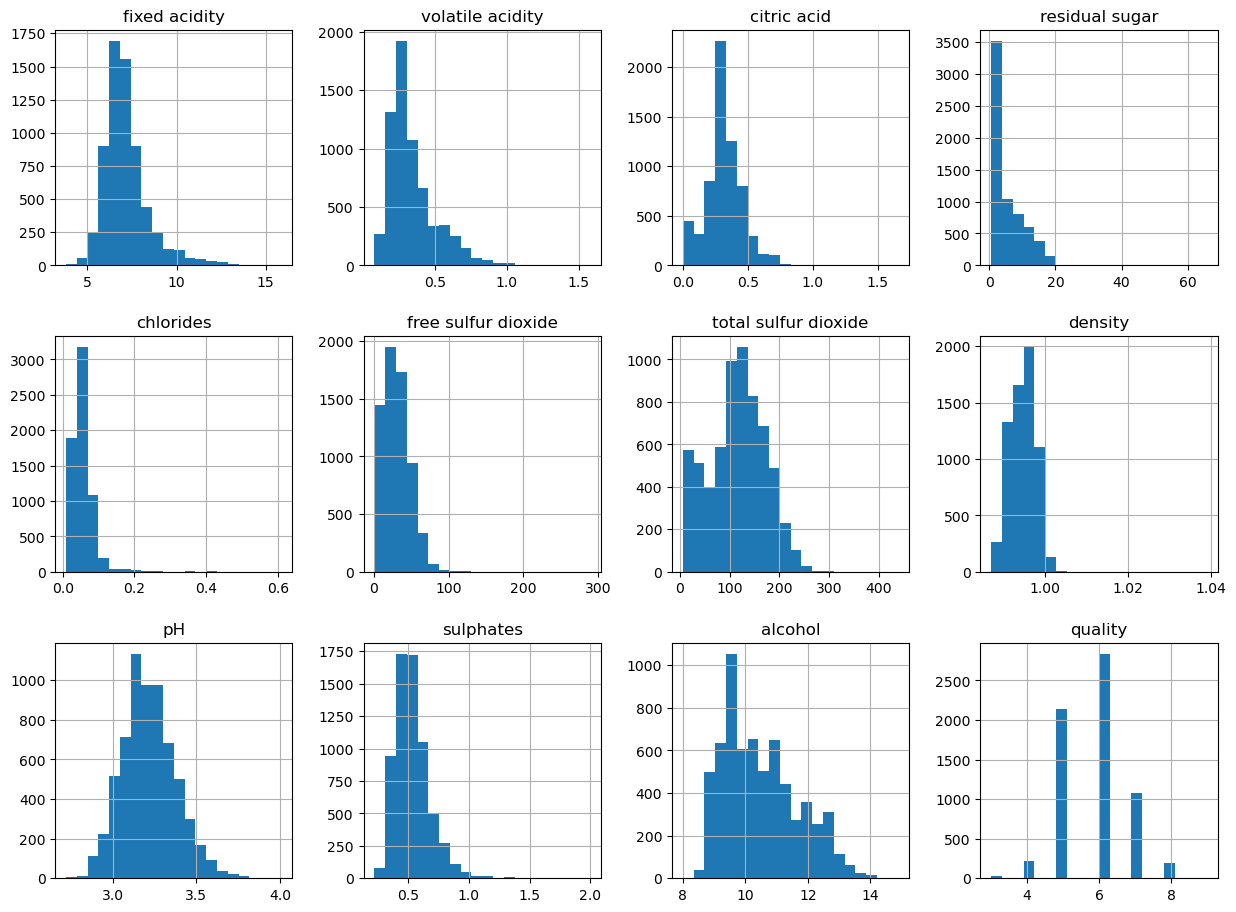

In [37]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

fixed acidity              AxesSubplot(0.125,0.747241;0.133621x0.132759)
volatile acidity        AxesSubplot(0.285345,0.747241;0.133621x0.132759)
citric acid              AxesSubplot(0.44569,0.747241;0.133621x0.132759)
residual sugar          AxesSubplot(0.606034,0.747241;0.133621x0.132759)
chlorides               AxesSubplot(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        AxesSubplot(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    AxesSubplot(0.285345,0.587931;0.133621x0.132759)
density                  AxesSubplot(0.44569,0.587931;0.133621x0.132759)
pH                      AxesSubplot(0.606034,0.587931;0.133621x0.132759)
sulphates               AxesSubplot(0.766379,0.587931;0.133621x0.132759)
alcohol                    AxesSubplot(0.125,0.428621;0.133621x0.132759)
quality                 AxesSubplot(0.285345,0.428621;0.133621x0.132759)
dtype: object

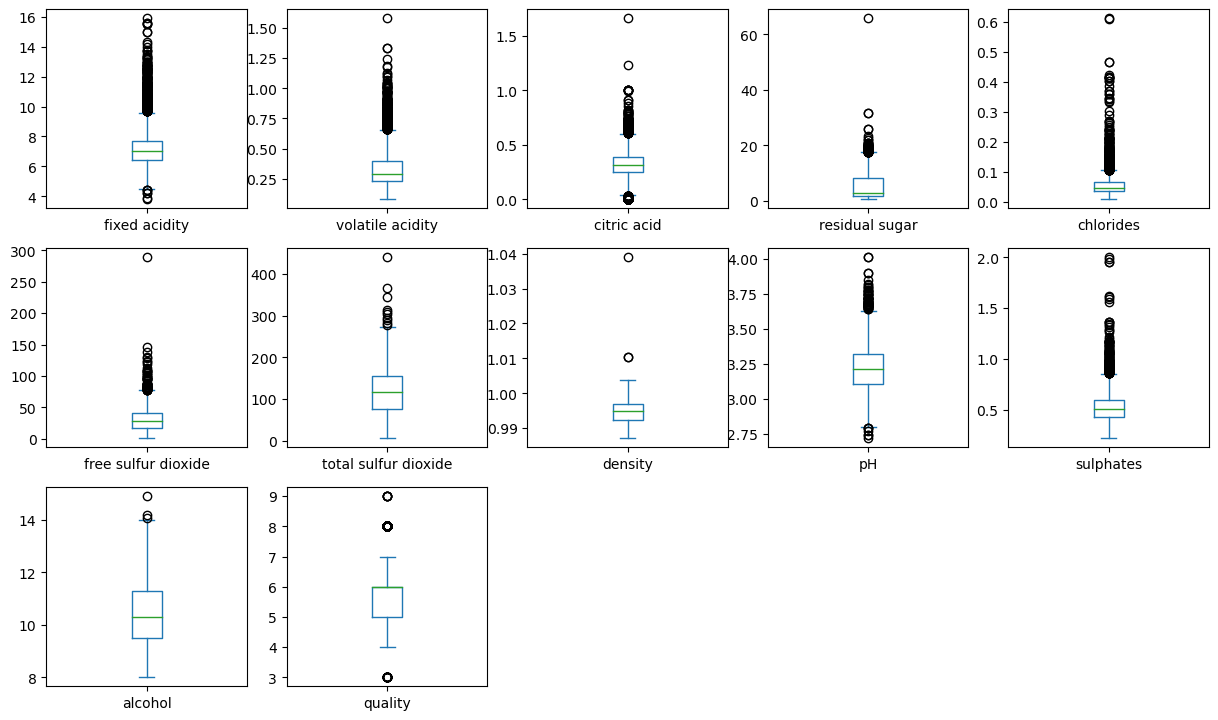

In [38]:
# buscar outliers con boxplots
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

C:\Users\kevin\AppData\Local\Temp\ipykernel_15588\2378446390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')


<AxesSubplot:>

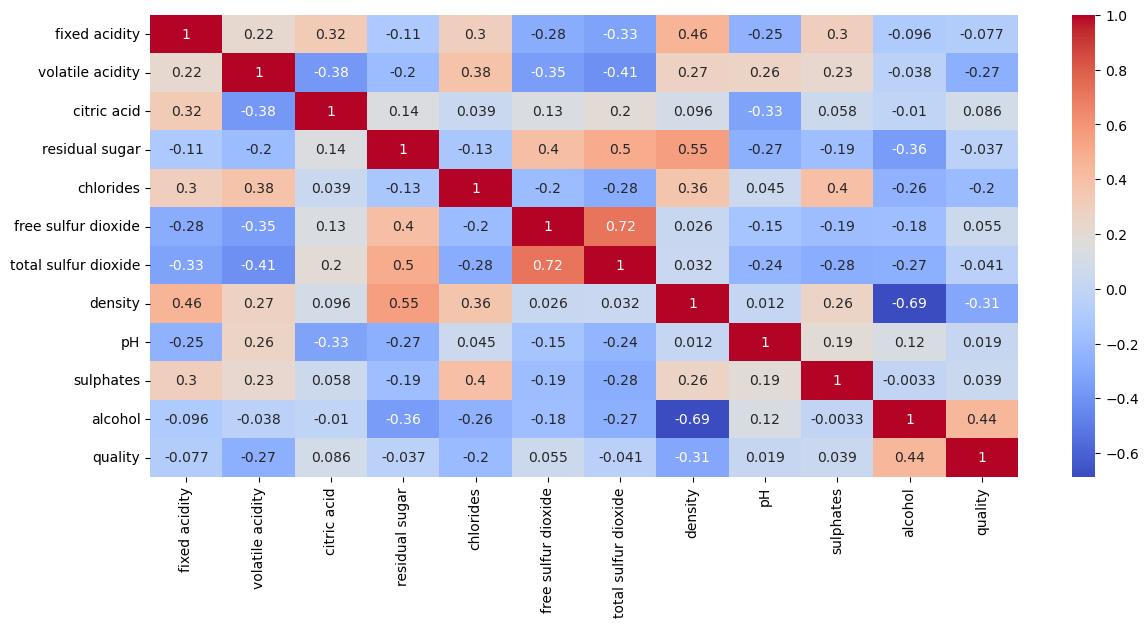

In [39]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

Observaciones:
- Esperable relacion entre "Total Sulfur Dioxide"

- Relación entre densidad y Azúcar Residual

- Relación inversamente proporcional entre Densidad y nivel de alcohol

- Relación entre calidad - Alcohol

- Relación entre "Fixed Acidity" y Densidad

> b) ¿Considera que están *balanceados* los valores de la variable objetivo?

Si analizamos los histogramas, podemos observar que existe una leve asimetria hacia la derecha en el grafico, lo que indica cierto sesgo en los datos (aunque no es pronunciado como en las variables de entrada). Esto podemos contrastarlo con los boxplot que a pesar de tener pocos outliers, la mediana se encuentra practicamente en la parte superior de la caja, esto quiere decir que la distribución no es simétrica y que la media, mediana y moda difieren entre si. No estan balanceados los valores de la variable Obj.

> c) ¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?

Afecta el desempeño y credibilidad de la predicción del modelo, puesto que existe un sesgo en la predicción que dificulta la correcta identificación de las clases minoritarias y valores que sean atípicos (outliers). 

In [40]:
df = pd.get_dummies(df,drop_first=True)

In [41]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### 1.1.3 Separación de conjuntos
> a) Separe el conjunto entre variables características y variable objetivo.

In [42]:
X = df.drop(['quality'], axis =1)
y = df['quality']

> b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

> c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de **entrenamiento** y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.

In [44]:
#Existen datos faltantes en:
#- fixed acidity (10)
#- volatile acidity (8)
#- citric acid (3)
#- residual sugar (2)
#- chlorides	 (2)
#- ph (9)
#- sulphates (4)

features_faltantes = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates']
for feature in features_faltantes:
    X_train = X_train.fillna(X_train[feature].mean())
    X_test = X_test.fillna(X_test[feature].mean())

print(datainfo(X_train))
print(datainfo(X_test))


                     DataType  Non-null_Values  Unique_Values  NaN_Values  \
fixed acidity         float64             5197            103           0   
volatile acidity      float64             5197            183           0   
citric acid           float64             5197             87           0   
residual sugar        float64             5197            307           0   
chlorides             float64             5197            202           0   
free sulfur dioxide   float64             5197            130           0   
total sulfur dioxide  float64             5197            272           0   
density               float64             5197            947           0   
pH                    float64             5197            108           0   
sulphates             float64             5197            106           0   
alcohol               float64             5197            104           0   
type_white              uint8             5197              2           0   

> d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.

In [45]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()

# type	fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                    'total sulfur dioxide','density','pH','sulphates','alcohol']

# ¿que diferencia hay entre .fit_transform y .transform
X_train[cols] = X_scaler.fit_transform(X_train[cols])
X_test[cols] = X_scaler.transform(X_test[cols])

#X_train[cols_to_normalize] = ?
#y_train = ?
# X_test[cols_to_normalize] = ?

e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.

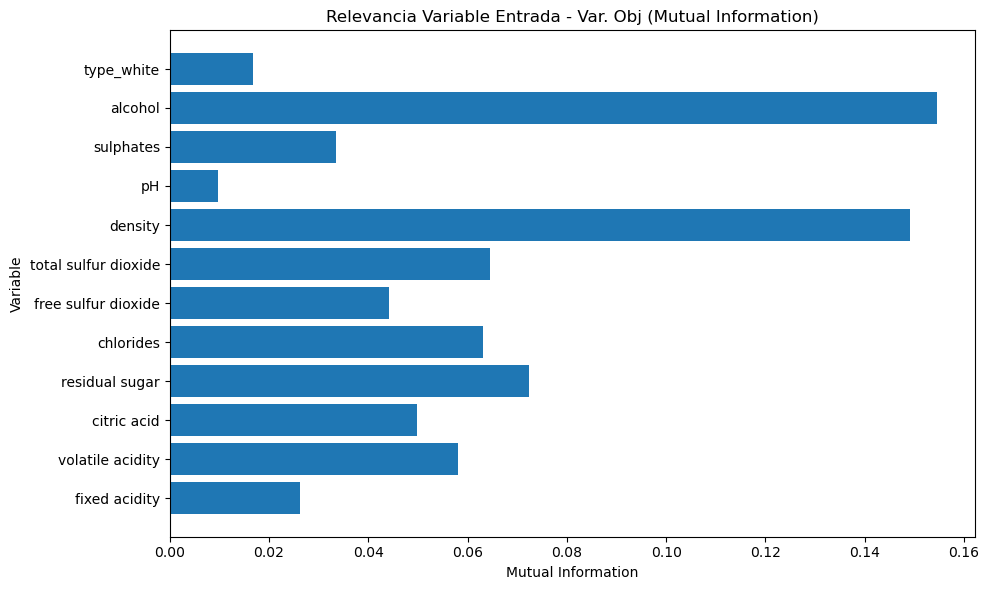

In [46]:
mi = mutual_info_classif(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, mi)
plt.xlabel('Mutual Information')
plt.ylabel('Variable')
plt.title('Relevancia Variable Entrada - Var. Obj (Mutual Information)')
plt.tight_layout()
plt.show()


> f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.

In [18]:
# Número de características a seleccionar
k = 4  
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X_train, y_train)

# Obtener los nombres de las características seleccionadas
selected_features = X_train.columns[selector.get_support()]

# Obtenemos los subconjuntos con las variables filtrados
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# Conjunto con todas las variables (original)
A = [X_train,y_train,X_test,y_test]

# Conjunto con variables filtradas
B = [X_train_filtered, y_train, X_test_filtered, y_test]


## 1.2 Modelos de Regresión

Para las siguientes preguntas usted debera entrenar, validar y evaluar los modelos utilizando los conjuntos $A$ y $B$ por separado, para luego hacer las respectivas comparaciones entre ambos. Cada modelo tiene sus propios hiperparámetros que usted deberá ajustar a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba. Usted estará explorando un subconjunto del espacio de hipótesis variando los hiperparámetros que se le indiquen en cada modelo usando el módulo gridsearchcv de la librería sklearn. En el módulo gridsearchcv fije los parámetros de la forma: 

In [19]:
#GridSearchCV(estimator, param_grid, scoring=mean_squared_error, refit=True)

Siendo estimator el modelo a utilizar, scoring, la métrica para evaluar el modelo y refit=True para una vez probado todo el subconjunto del espacio de hipótesis, escojer el mejor modelo y entrnarlo con todo el conjunto de entrenamiento.

**Nota:** puede utilizar parte del código utilizado en la tarea 1 de esta asignatura.

### 1.2.1 Árbol de regresión

Entrene un árbol de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> a) max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

> b) max_leaf_nodes: Probar con los valores 10, 50, 100. Describa brevemente qué es lo que significa modificar este hiperparámetro.

**Nota:** Recuerde que estos experimentos debe realizarlos para ambas representaciones de los conjuntos ($A$ y $B$).



In [20]:
# Conjunto A
param_grid = {'max_depth': [2, 20, 200], 'max_leaf_nodes' : [10, 50, 100]}
modelDTR_A = DecisionTreeRegressor(random_state=0)
modelDTR_A.fit(X_train,y_train)
hypereg_A = GridSearchCV(modelDTR_A, param_grid, scoring='neg_mean_squared_error', refit=True)
hypereg_A.fit(X_train, y_train)
pd.DataFrame(hypereg_A.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005195,0.002712,0.001252,0.001991,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.563135,-0.595375,-0.614234,-0.610795,-0.529419,-0.582592,0.032143,7
1,0.006323,0.001489,0.001151,0.001331,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.563135,-0.595375,-0.614234,-0.610795,-0.529419,-0.582592,0.032143,7
2,0.007311,0.000431,0.002154,0.001532,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.563135,-0.595375,-0.614234,-0.610795,-0.529419,-0.582592,0.032143,7
3,0.012626,0.001528,0.001211,0.000989,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.549189,-0.561342,-0.588167,-0.588923,-0.516990,-0.560922,0.026812,5
4,0.016862,0.001498,0.001789,0.001209,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.544778,-0.542642,-0.533491,-0.555265,-0.499354,-0.535106,0.019171,1
5,0.019615,0.001315,0.001937,0.001520,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.545295,-0.536840,-0.533851,-0.587802,-0.516789,-0.544116,0.023727,3
6,0.009995,0.001815,0.003062,0.002121,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.549189,-0.561342,-0.588167,-0.588923,-0.516990,-0.560922,0.026812,5
7,0.017102,0.002599,0.001257,0.002025,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.544778,-0.542642,-0.533491,-0.555265,-0.499354,-0.535106,0.019171,1
8,0.019158,0.001948,0.002010,0.001631,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.545295,-0.536840,-0.533851,-0.587802,-0.516789,-0.544116,0.023727,3


In [21]:
# Conjunto B
modelDTR_B = DecisionTreeRegressor(random_state=0)
modelDTR_B.fit(X_train_filtered,y_train)
hypereg_B = GridSearchCV(modelDTR_B, param_grid, scoring='neg_mean_squared_error', refit=True)
hypereg_B.fit(X_train_filtered, y_train)
pd.DataFrame(hypereg_B.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005696,0.002386,0.000000,0.000000,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.580982,-0.617069,-0.645666,-0.642506,-0.567948,-0.610834,0.031577,7
1,0.004058,0.003053,0.001524,0.002404,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.580982,-0.617069,-0.645666,-0.642506,-0.567948,-0.610834,0.031577,7
2,0.004146,0.003069,0.001399,0.002410,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.580982,-0.617069,-0.645666,-0.642506,-0.567948,-0.610834,0.031577,7
3,0.006931,0.000015,0.000000,0.000000,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.572776,-0.601831,-0.610399,-0.642577,-0.557720,-0.597061,0.029698,5
4,0.009443,0.003097,0.000319,0.000391,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.569890,-0.592463,-0.571962,-0.606535,-0.544908,-0.577152,0.021058,1
5,0.008328,0.002839,0.002769,0.003415,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.621327,-0.596847,-0.584032,-0.613567,-0.550988,-0.593352,0.024840,3
6,0.007798,0.001689,0.000555,0.001110,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.572776,-0.601831,-0.610399,-0.642577,-0.557720,-0.597061,0.029698,5
7,0.011086,0.003115,0.000000,0.000000,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.569890,-0.592463,-0.571962,-0.606535,-0.544908,-0.577152,0.021058,1
8,0.010905,0.003332,0.001414,0.002419,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.621327,-0.596847,-0.584032,-0.613567,-0.550988,-0.593352,0.024840,3


Responda las siguientes preguntas:

> c) ¿Cuántos modelos de árboles de regresión le quedan en total?

Nos quedan 9 por conjunto (18 en total).

> d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.




In [22]:
y_pred_DTR_A = hypereg_A.predict(X_test)
DTR_A_mse = mean_squared_error(y_test, y_pred_DTR_A)

y_pred_DTR_B = hypereg_B.predict(X_test_filtered)
DTR_B_mse = mean_squared_error(y_test, y_pred_DTR_B)

print("Error A: ",DTR_A_mse,"\nError B: ",DTR_B_mse)

Error A:  0.5652754300466665 
Error B:  0.6127407797826062


In [23]:

#y_pred = y_scaler.inverse_transform(np.array(model1.predict(X_test)).reshape(-1, 1))


> c) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.

### 1.2.2 Random Forest Regressor

Entrene un bosque aleatorio de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. 



In [24]:
param_grid = {
    'max_depth': [2, 20, 200],  
    'max_samples': [0.1, 0.5, 1.0]  
}

#conjunto A
modelRFR_a = RandomForestRegressor(random_state=0)
modelRFR_a.fit(X_train,y_train)

#conjunto B
modelRFR_b = RandomForestRegressor(random_state=0)
modelRFR_b.fit(X_train_filtered,y_train)

#Creación modelos y entramiento.
hyperegRFR_A = GridSearchCV(modelRFR_a, param_grid, scoring='neg_mean_squared_error', refit=True)
hyperegRFR_B = GridSearchCV(modelRFR_b, param_grid, scoring='neg_mean_squared_error', refit=True)

hyperegRFR_A.fit(X_train,y_train)
hyperegRFR_B.fit(X_train_filtered,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [2, 20, 200],
                         'max_samples': [0.1, 0.5, 1.0]},
             scoring='neg_mean_squared_error')

Respecto a lo anterior responda las siguientes preguntas:
> a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.

- Averaging (Bagging): Este método combina las predicciones de varios modelos independientes y utilizar alguna métrica en base a estas predicciones (como la media) para obtener una predicción final. Esto se hace para reducir la varianza y mejorar la estabilidad del modelo.


- Boosting: Este método considera entrenar modelos débiles de manera iterativa, donde cada modelo se ajusta para corregir los errores cometidos por los modelos anteriores. En lugar de promediar las predicciones, se asignan pesos a cada modelo en función de su rendimiento, lo que permite que los modelos posteriores se centren más en los casos difíciles de predecir. 


Averaging **combina** las predicciones obtenidas de los modelos en base a alguna métrica, mientras que Boosting entrena modelos de manera iterativa y cada **"generación" ayuda a que los posteriores** aprendan de estos ajustando los errores residuales y asignando mayor peso a observaciones que los modelos anteriores predijieron de manera deficiente.

> b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?

Random Forest pertenece al Averaging.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [25]:
y_pred = hyperegRFR_A.predict(X_test)
RFR_A_mse = mean_squared_error(y_test, y_pred)

y_pred = hyperegRFR_B.predict(X_test_filtered)
RFR_B_mse = mean_squared_error(y_test, y_pred)

print("Error A: ",RFR_A_mse,"\nError B: ",RFR_B_mse)

Error A:  0.4155682307692308 
Error B:  0.5085030900641025


### 1.2.3 Bagging Regressor

Entrene un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* n_estimators: Probar con 10, 100, 1000 estimadores. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

In [26]:
param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_samples' : [0.1, 0.5, 1.0]
}

#conjunto A
modelBR_A = BaggingRegressor(base_estimator=modelDTR_A)
modelBR_A.fit(X_train,y_train)

#conjunto B
modelBR_B = BaggingRegressor(base_estimator=modelDTR_B)
modelBR_B.fit(X_train_filtered,y_train)

#Creación modelos y entramiento.
hyperegBR_A = GridSearchCV(modelBR_A, param_grid, scoring='neg_mean_squared_error', refit=True)
hyperegBR_B = GridSearchCV(modelBR_B, param_grid, scoring='neg_mean_squared_error', refit=True)

hyperegBR_A.fit(X_train,y_train)
hyperegBR_B.fit(X_train_filtered,y_train)

y_pred = hyperegBR_A.predict(X_test)
BR_A_mse = mean_squared_error(y_test, y_pred)

y_pred = hyperegBR_B.predict(X_test_filtered)
BR_B_mse = mean_squared_error(y_test, y_pred)

print("Error A: ",BR_A_mse,"\nError B: ",BR_B_mse)

Error A:  0.40539192923076933 
Error B:  0.5007432191541514


Responda las siguientes preguntas:

> a) ¿Cómo funciona el modelo Bagging?

De manera paralela, entrena diversos modelos y el output que produzcan es combinado a través de alguna métrica, de esta manera obtenemos una reducción en la varianza del ensamble, a causa de la independencia de cada submodelo y su posterior combinación mediante promedio o votación.

> b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.

El Bagging regresor pertenece a los métodos de averaging (Bagging que hace regresión, ya que se promedian las predicciones de los miembros del ensamble.).

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [29]:
print("Arboles de Regresion\nError A: ",DTR_A_mse,"\nError B: ",DTR_B_mse,"\n")
print("Random Forest Regressor\nError A: ",RFR_A_mse,"\nError B: ",RFR_B_mse,"\n")
print("Bagging Regressor\nError A: ",BR_A_mse,"\nError B: ",BR_B_mse,"\n")

Arboles de Regresion
Error A:  0.5652754300466665 
Error B:  0.6127407797826062 

Random Forest Regressor
Error A:  0.4155682307692308 
Error B:  0.5085030900641025 

Bagging Regressor
Error A:  0.40539192923076933 
Error B:  0.5007432191541514 



In [ ]:
La combinación que mejores resultados ha dado, ha sido aparentemente el Bagging Regressor con el conjunto A de Datos.

## 1.3 Conclusiones

Comente con qué modelo y representación obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

En base a estos resultados, se puede concluir que el modelo A, con la representación original, obtiene los mejores resultados en términos de menor error. Específicamente, el modelo A con baggin muestra el menor error entre todos los modelos evaluados. Pero a medida que se obtenian mejores resultados con los distintos metodos el tiempo de ejecución era mucho mayor, siendo bagging el que más se demoro y no dio resultados tan distintos a los de random forest.
Para intentar mejorar aún más los resultados, se podrían realizar los siguientes experimentos:
Experimentar con otros algoritmos de aprendizaje automático: Probar otros algoritmos como Support Vector Machines (SVM), Gradient Boosting, Redes Neuronales, entre otros, para evaluar si alguno de ellos puede mejorar el rendimiento en comparación con los modelos actuales.
Ajustar hiperparámetros: Realizar una búsqueda más exhaustiva de los hiperparámetros óptimos para los modelos existentes, utilizando técnicas como GridSearchCV o RandomizedSearchCV. Esto permitiría encontrar la combinación de hiperparámetros que mejor se ajuste a los datos y potencialmente mejorar el rendimiento.

# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://imgtr.ee/images/2023/06/04/bSx54.jpg" alt="bSx54.jpg" border="0" width="480" height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt

In [18]:
for dirname, _, filenames in os.walk('C:/Users/kevin/OneDrive/Escritorio/dataset2_tarea2/human+activity+recognition+using+smartphones'):
    for filename in filenames:m
        print(os.path.join(dirname, filename))

IndentationError: unexpected indent (1691899493.py, line 3)

In [19]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> b) Obtenga la ruta exacta de los archivos e insertelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.

In [20]:
train_paths = ['C:/Users/kevin/OneDrive/Escritorio/dataset2_tarea2/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/' + signal + 'train.txt' for signal in SIGNALS]
test_paths = ['C:/Users/kevin/OneDrive/Escritorio/dataset2_tarea2/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/' + signal + 'test.txt' for signal in SIGNALS]

> c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:
* n_samples: es el tamaño de la muestra, o sea, el total de experimentos.
* signal_len: es el largo de la señal de los sensores.
* sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.


In [145]:
def __load_X(X_signal_paths):
    dataset = []
    for i in range(len(X_signal_paths)):
        data = np.loadtxt(X_signal_paths[i])
        dataset.append(data)
    np.stack(dataset,axis=2)
    return np.stack(dataset,axis=2)

In [146]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)

print(x_train.shape)

(7352, 128, 9)


> d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

In [147]:
y_train = np.loadtxt('C:/Users/kevin/OneDrive/Escritorio/dataset2_tarea2/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',  dtype=np.int32)
y_test = np.loadtxt('C:/Users/kevin/OneDrive/Escritorio/dataset2_tarea2/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', dtype=np.int32)

### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:

> a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?

- Train: 7352
- Test: 2947

> b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?

- Conjunto de training: (7352, 128, 9)
- Conjunto de Test: (2947, 128, 9)

> c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histográmas, boxplots heatmaps de correlación, etc.

(Agregar boxplots y cositasss)

> d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?

> e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.

In [148]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))
    
print(x_train)

[[ 1.808515e-04  1.076681e-02  5.556068e-02 ...  1.021171e+00
  -1.213260e-01  9.498741e-02]
 [ 1.093752e-03 -4.687588e-03 -2.685954e-02 ...  1.017849e+00
  -1.305193e-01  9.061235e-02]
 [ 3.531266e-03  4.455942e-03 -5.914581e-03 ...  1.022019e+00
  -1.301826e-01  8.148748e-02]
 ...
 [-2.267175e-01  5.684462e-02  2.289274e-01 ...  7.767680e-01
  -3.275988e-01  1.886212e-01]
 [-6.480597e-02 -5.740777e-03  3.102535e-01 ...  7.193530e-01
  -2.291273e-01  2.100712e-01]
 [-1.944707e-01 -9.723743e-02  2.030342e-01 ...  8.002428e-01
  -3.323721e-01 -8.357159e-02]]


> f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?

### 2.1.3 Procesamiento del conjunto de datos

> a)Transforme las clases a One Hot Encoder

In [149]:
onehot_encoder = OneHotEncoder(sparse_output=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


In [150]:
LABELS[np.argmax(y_train_OHE[400])]

'SITTING'

> b) ¿Estan bien balanceadas las clases?

> c) Estandarice los atributos con media 0 y varianza 1.

In [151]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Apply the scaler to transform the training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales

> a) ¿Cómo se entrena una red neuronal feedforward?

Estas redes consideran el paso de data desde la capa de entrada, pasando por las capas escondidas (Hidden layers) hasta llegar a la capa de salida. Esto quiere decir, recibe input, entrega Output. Por lo que es necesario inicializar pesos y sesgos (biases) y posteriormente entregar información para ajustar estos de manera que optimice la capacidad de generalización.

> b) ¿Qué es una neurona en este contexto?

Unidad sencilla que compone las capas de la red neuronal, estas permiten la transmisión de la información ya sea dejandola intacta, modificandola o impedir que se transmita a través de funciones de activación (llamandolo coloquialmente como umbral), Y a su vez, tiene asociado un peso.

> c) ¿Qué es una función de activación y para que sirven?

Es una función de activación que modifica el valor que recibe o funciona como un limite que debe superar para que la información se traspase a la próxima neurona. Es decir, funciona como una función umbral. Transmite la información generada como combinación lineal de inputs y pesos (o bien, no transmitirla).

> d) ¿A qué se le llama capa densa?

Se le llama capa densa a aquella capa cuya cada nodo (neurona) esta conectada a todas las neuronas de la próxima capa.

> e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?

La cantidad de pesos se calcula de la $\sum_{i = 1}^{N-1} (n_{i} + 1) * n_{i+1}$ = (I + 1) * n_{2} + $\sum_{i = 3}^{N-2} (n_{i} + 1) * n_{i+1}$ + (O + 1) n_{n-1}

> f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?

El gradiente desvaneciente se refiere al fenómeno que ocurre en backpropagation al aplicar una derivada (gradientes pequeños y lejos del cero, lo que ocurre por ejemplo en la sigmoide) y en cada iteración, la actualización de los pesos hace que la diferencia sea cada vez más pequeña, que conllevara finalmente a que los pesos queden eventualmente iguales entre actualización. El gradiente explosivo por otro lado, es el fenómeno contrario, al aplicar la derivada (mayor a 1), la actualización de los pesos se vuelve más agresiva y estos van a ser cada vez mayores a medida que se acerca a la capa de Input.

> g) Para esta tarea, como debería ser la capa de salida de la red considerando que previemente aplicó una transformación One Hot Encoding a las clases del conjunto?

La capa de salida debe considerar 6 neuronas con funciones softmax, de esta manera se asegura que la suma de los output den como resultado 1.

> h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parametros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:

* input_layer -> output_layer

* input_layer -> hidden_layer(32, tanh) -> output_layer

* input_layer -> hidden_layer(32, sigmoid) -> output_layer

* input_layer -> hidden_layer(32, relu) -> output_layer


In [152]:
input_layer = Input(shape = (x_train.shape[1:]))

# Model 1
output_layer = Dense(units=6, activation='softmax')(input_layer)
ANN_1 = Model(inputs = input_layer , outputs = output_layer)

# Model 2
layer_tanh = Dense(units=32, activation='tanh')(input_layer)
output_layer = Dense(units=6, activation=softmax)(layer_tanh)
ANN_tanh = Model(inputs = input_layer , outputs = output_layer)

# Model 3
layer_sigmoid = Dense(units=32, activation='sigmoid')(input_layer)
output_layer = Dense(units=6, activation=softmax)(layer_sigmoid)
ANN_sigmoid = Model(inputs = input_layer , outputs = output_layer)

# Model 4
layer_relu = Dense(units=32, activation='relu')(input_layer)
output_layer = Dense(units=6, activation=softmax)(layer_relu)
ANN_relu = Model(inputs = input_layer , outputs = output_layer)

#layer_tanh = Dense(units=32, activation=tanh)(input_layer)
#layer_sigmoid = Dense(units=32, activation=sigmoid)(input_layer)
#layer_relu = Dense(units=32, activation=relu)(input_layer)
#output_layer = Dense(units=6, activation=softmax)(layer_1)
#ANN = Model(inputs = input_layer , outputs = output_layer)

> i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).

In [153]:
ANN_1.summary()
ANN_tanh.summary()
ANN_sigmoid.summary()
ANN_relu.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_21 (Dense)            (None, 6)                 6918      
                                                                 
Total params: 6,918
Trainable params: 6,918
Non-trainable params: 0
_________________________________________________________________
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_22 (Dense)            (None, 32)                36896     
                                                                 
 dense_23 (Dense)            (None, 6)

 > j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:

* ¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?

Deberiamos observar la accuracy, función de pérdida

* ¿Qué es la paciencia en este contexto?

La paciencia define el número de epochs sin cambios que aguantará el entrenamiento antes de detenerse.

* ¿Para qué se usa el parámetro min_delta?

Es el monto mínimo designado que una cantidad debe cambiar para considerar que ha realizado una mejora aceptable. (o más que mejora, una diferencia aceptable).


> k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:

* ¿Qúe función de pérdida se debe usar para este problema (loss)?

Se debe usar categorical_crossentropy.

**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

In [154]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='categorical_accuracy',mode='max', verbose=1, patience=20)
# modelos compilados
## Modelo Input -> Output
ANN_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
## Modelo con funcion tanh
ANN_tanh.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
## Modelo funcion sigmoid
ANN_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
## Modelo Relu
ANN_relu.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

> l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.

* ¿Qué significa el batch_size?

Es el número de muestras que debe tener la red para el entrenamiento.

**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

In [155]:

history_1 = ANN_1.fit(x_train,y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop],verbose=0)

history_tanh = ANN_tanh.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop],verbose=0)

history_sigmoid = ANN_sigmoid.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop],verbose=0)

history_relu = ANN_relu.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop],verbose=0)

lista_history = [history_1,history_tanh,history_sigmoid,history_relu]

> m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [156]:
loss_score_1, accuracy_score_1 = ANN_1.evaluate(x_test, y_test_OHE)
loss_score_tanh, accuracy_score_tanh = ANN_tanh.evaluate(x_test,y_test_OHE)
loss_score_sigmoid, accuracy_score_sigmoid = ANN_sigmoid.evaluate(x_test, y_test_OHE)
loss_score_relu, accuracy_score_relu = ANN_relu.evaluate(x_test, y_test_OHE)

print("Red Básica:\n Loss: ",loss_score_1,"\nAccuracy",accuracy_score_1,"\n")
print("Red Tanh:\n Loss: ",loss_score_tanh,"\nAccuracy",accuracy_score_tanh,"\n")
print("Red sigmoid:\n Loss: ",loss_score_sigmoid,"\nAccuracy",accuracy_score_sigmoid,"\n")
print("Red relu:\n Loss: ",loss_score_relu,"\nAccuracy",accuracy_score_relu)

93/93 [==============================] - 0s 2ms/step - loss: 0.3996 - categorical_accuracy: 0.8683
Red Básica:
 Loss:  1.3081655502319336 
Accuracy 0.5609093904495239 

Red Tanh:
 Loss:  0.6056914925575256 
Accuracy 0.8150661587715149 

Red sigmoid:
 Loss:  0.9147430658340454 
Accuracy 0.7013912200927734 

Red relu:
 Loss:  0.3996470272541046 
Accuracy 0.8683406710624695


>n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])
Modelo ------->  Sin Capas Ocultas <-------


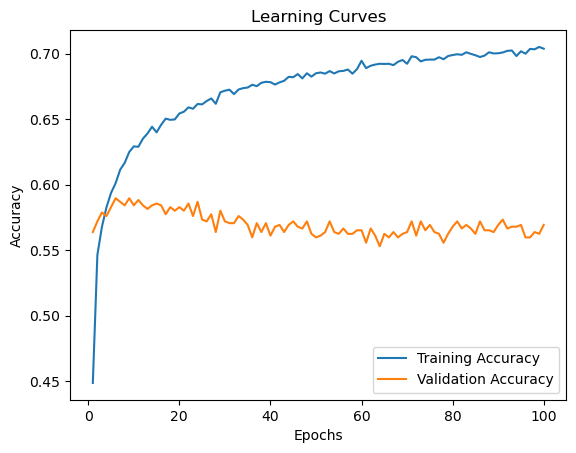

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])
Modelo ------->  Tanh <-------


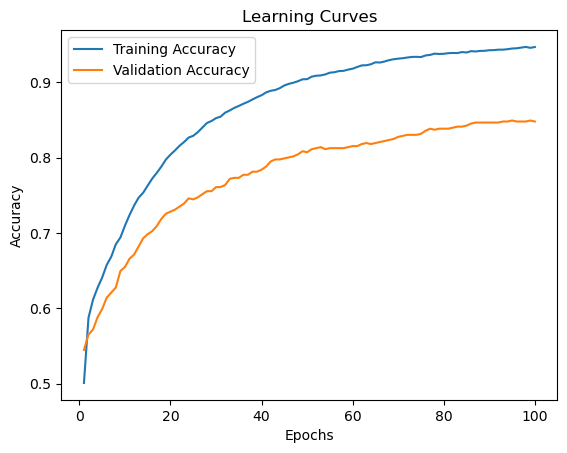

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])
Modelo ------->  Sigmoid <-------


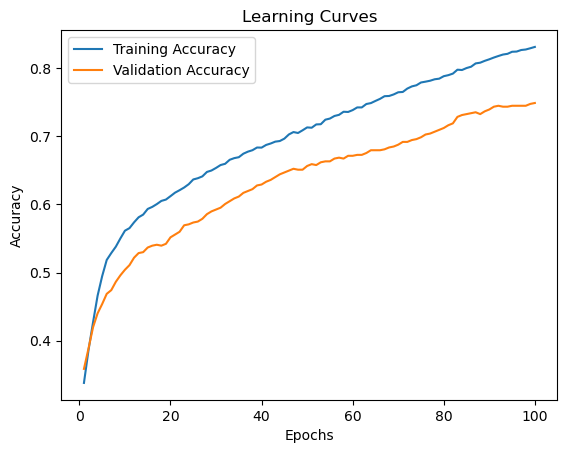

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])
Modelo ------->  Relu <-------


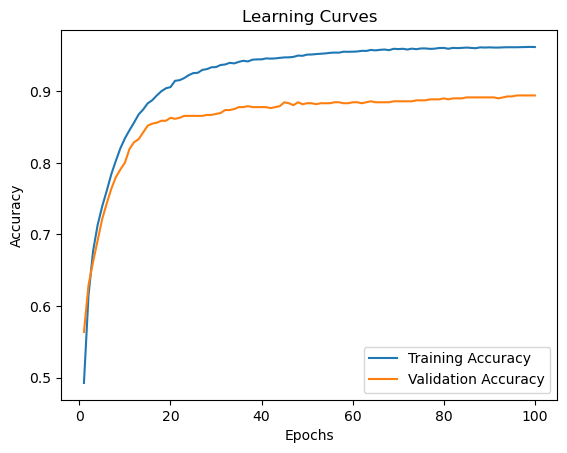

In [157]:
import matplotlib.pyplot as plt

lista_nombre = ['Sin Capas Ocultas', 'Tanh','Sigmoid','Relu']

# Access the training and validation errors from the history object
for i in range(len(lista_history)):
    print(lista_history[i].history.keys())
    #print(history.history.keys())
    print('Modelo -------> ',lista_nombre[i], '<-------')
    train_errors = lista_history[i].history['categorical_accuracy']
    val_errors = lista_history[i].history['val_categorical_accuracy']

    # Get the number of epochs
    epochs = range(1, len(train_errors) + 1)

    # Plotting the learning curves
    plt.plot(epochs, train_errors, label='Training Accuracy')
    plt.plot(epochs, val_errors, label='Validation Accuracy')
    
    # Adding labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend()

    # Displaying the plot
    plt.show()

Modelo ------->  Sin Capas Ocultas <-------


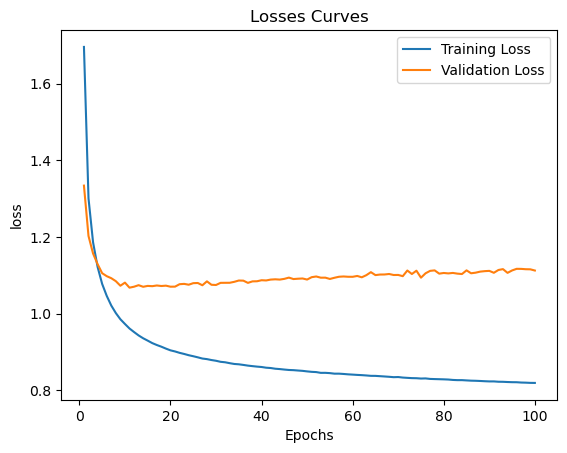

Modelo ------->  Tanh <-------


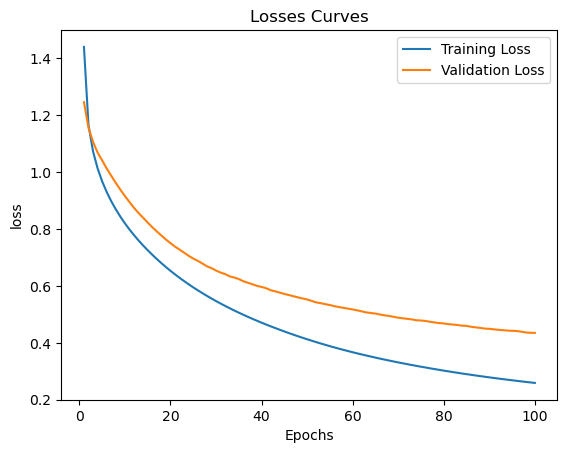

Modelo ------->  Sigmoid <-------


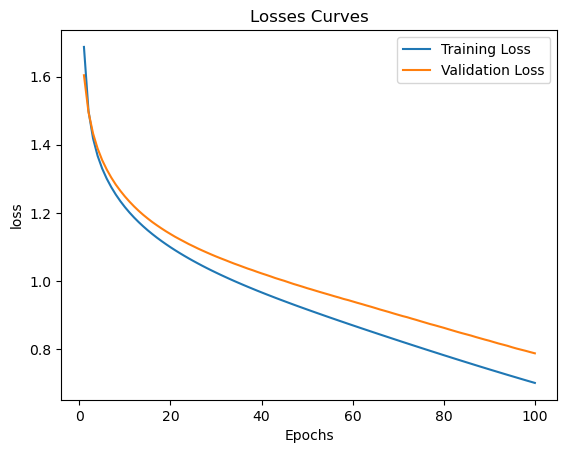

Modelo ------->  Relu <-------


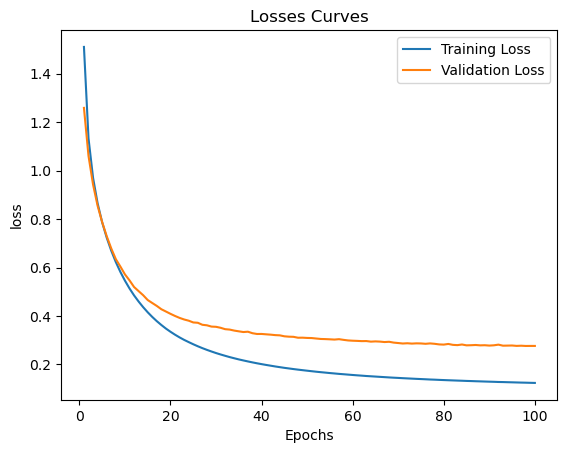

In [158]:
# Red seleccionada -----> Sigmoid

for i in range(len(lista_history)):
    #print(history.history.keys())
    print('Modelo -------> ',lista_nombre[i], '<-------')
    train_errors = lista_history[i].history['loss']
    val_errors = lista_history[i].history['val_loss']

    # Get the number of epochs
    epochs = range(1, len(train_errors) + 1)

    # Plotting the learning curves
    plt.plot(epochs, train_errors, label='Training Loss')
    plt.plot(epochs, val_errors, label='Validation Loss')
    
    # Adding labels and title
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Losses Curves')
    plt.legend()

    # Displaying the plot
    plt.show()

> o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.

In [159]:
#ANN_1
#ANN_sigmoid
#ANN_tanh
#ANN_relu
ANN_relu.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=15,
                  callbacks=[early_stop],
                  verbose=0)

> p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.

In [160]:
y_pred = ANN_relu(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [161]:
y_test_comp = np.argmax(y_test_OHE, axis=1)

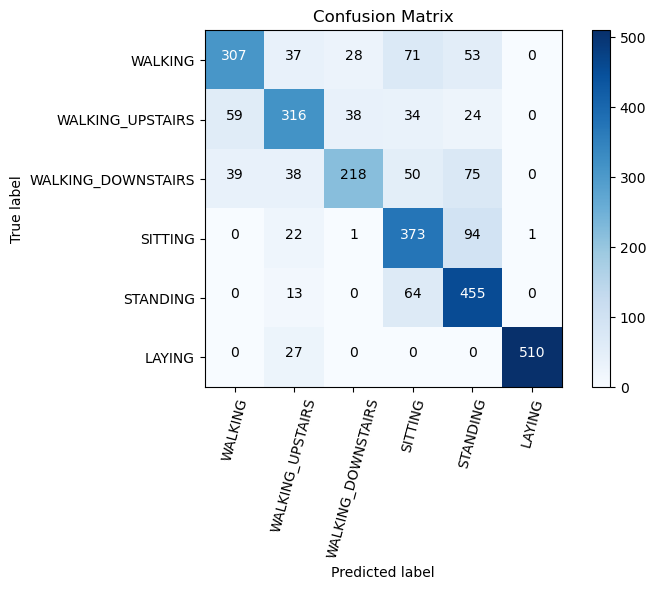

In [162]:
from sklearn.metrics import confusion_matrix

cat = np.array([1,2,3,4,5,6])

# Create the confusion matrix
cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()


> q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.

### 2.2.2 AdaBoost y arbustos

> a) Describa brevemente como funciona el modelo AdaBoost.

> b) ¿Qué clasificador se puede usar junto con Adaboost?

> c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?

> d) Separe el conjunto de entrenamiento dejando el 10% para validación.

> e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py



In [ ]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)
x_train_val, x_val, y_train_val, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [44]:
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

> f) Revise el error de validación con el conjunto de validaión.

In [ ]:
ada_errors = []

for ada_val_predict in ada.staged_predict(x_val):
    ada_val_errors.append(1.0 - accuracy_score(ada_val_predict, y_val))    

n_trees_ada = len(ada)

> g) Haga la misma prueba pero ahora con 30 estimadores

In [ ]:
ada_30 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=1
)
x_train_val, x_val, y_train_val, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
ada_30.fit(x_train, y_train)

> h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejr modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.

> i) Muestre la matriz de confusión y comente sus resultados.

## 2.3 Conclusiones

Comente con qué modelo obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

